In [33]:
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import math

from matplotlib.font_manager import FontProperties

In [34]:
def sample(low_bound, up_bound, size):
    """This Function generates a sample based on size and bounds

    Args:
        low_bound (int): lower bound of the sample
        up_bound (int): upper bouund of the sample
        size (int): size of the sample

    Returns:
        sample (int):a randomly generated sample
    """
    sample = low_bound + np.random.random_sample((size,))* (up_bound - low_bound)
    return sample

def gd_function_a(x, x1, x2):
    """A hypothesis found by learning algorithm h(x) = ax + b

    Args:
        x (double): x value of data point
        x1 (int): positive bounding limit of the sin function 
        x2 (int): negative bounding limit of the sin function

    Returns:
        double : h(x) = ax + b
    """
    a = (np.sin(math.pi*x2)-np.sin(math.pi*x1))/(x2-x1)
    b = (x2*np.sin(math.pi*x1)-x1*np.sin(math.pi*x2))/(x2-x1)
    return a*x + b

def gd_function_b(x, x1, x2):
    """A hypothesis found by learning algorithm h(x) = ax

    Args:
        x (double): x value of data point
        x1 (int): positive bounding limit of the sin function 
        x2 (int): negative bounding limit of the sin function

    Returns:
        double : h(x) = ax
    """
    a = (x1*np.sin(math.pi*x1)+x2*np.sin(math.pi*x2))/(np.power(x1,2)+ np.power(x2, 2))
    return a*x

def gd_function_c(x, x1, x2):
    """A hypothesis found by learning algorithm h(x) = b

    Args:
        x (double): x value of data point
        x1 (int): positive bounding limit of the sin function 
        x2 (int): negative bounding limit of the sin function

    Returns:
        double : h(x) = b
    """
    return 0.5*(np.sin(math.pi*x1)+np.sin(math.pi*x2))

In [35]:
def avg_g(x, gd_function, num_samples, targetfunc):
    """Computes g_bar_fucntion which is the average of all hypothesis gd

    Args:
        x (_type_): _description_
        gd_function : _description_
        num_samples (int): number of samples
        targetfunc : the target function f(x)

    Returns:
        g_bar_function: gbar at x
        variance_g_bar_function: variance of the g_bar function at x
        bias_g_bar_function: bias of the g_bar function at x
    """
    bias_g_bar_function = 0
    gd_funcs = []
    for i in range(num_samples):
        #generate 2 sample data each time
        x1, x2 = sample(-1, 1, 2)
        v = gd_function(x, x1, x2)
        gd_funcs.append(v)
        
    g_bar_function = np.mean(gd_funcs)
    variance_g_bar_function = np.var(gd_funcs)
    bias_g_bar_function = np.power((g_bar_function - targetfunc(x)),2)
    return g_bar_function, variance_g_bar_function, bias_g_bar_function

In [36]:
# Compute the expected value of variance, bias and out-of-sample error
def calc_bias_var_eout(gd_func, target_func, num_data_samples, num_x_samples):
    """Computes Bias, Variance and Expected Value of Out of Sample error

    Args:
        gd_func : final hypothesis function gd(x)
        target_func: f(x) 
        num_data_samples (int): total number of samples
        num_x_samples (int): a range of values for x
    """
    variances, biases, eouts = [], [], []
    for i in range(num_x_samples):
        x = sample(-1, 1, 1)
        _, variance, bias = avg_g(x, gd_func, num_data_samples, target_func)
        variances.append(variance)
        biases.append(bias)
        
        # Mean Square error between gd(x) and f(x) at every x
        eout_on_data = []
        for i in range(num_data_samples):
            x1, x2 = sample(-1, 1, 2)
            v= gd_func(x, x1, x2)
            eout_on_data.append((v-target_func(x))**2) # (g^{D}(x) - f(x))**2

        eout_data_avg = np.mean(eout_on_data)
        eouts.append(eout_data_avg)

    variance = np.mean(variances)    
    bias = np.mean(biases)
    eout = np.mean(eouts)
    print('The variance is: ', variance)
    print('The bias is: ', bias)
    print('The expected out-of-sample error is: ', eout)
    print('The variance+bias is: ', variance+bias)



In [37]:
def plot_graph(gd_func, target_func, num_data_samples, num_x_samples):
    """Plots the graphs for g_bar and target fucntion with bounds 

    Args:
        gd_func : final hypothesis function
        target_func: f(x) 
        num_data_samples (int): total number of samples
        num_x_samples (int): a range of values for x
    """
    
    xs = np.arange(-1, 1, 0.01)
    true_f, avg_gf, var_gf, ubs, lbs = [],[], [], [], []
    for x in xs:
        true_f.append(target_func(x))
        mean_g, var_g, bias_g = avg_g(x, gd_func, num_data_samples, target_func)
        avg_gf.append(mean_g)
        var_gf.append(var_g)
        ubs.append(mean_g + np.sqrt(var_g))
        lbs.append(mean_g - np.sqrt(var_g))
        
    plt.plot(xs, true_f, color='green', label='True Function')
    plt.plot(xs, avg_gf, color='purple', label='Average Hypothesis g_bar')
    plt.plot(xs, ubs, color='red', label='Upper bound of the average hypothesis')
    plt.plot(xs, lbs, color='red', label='Lower bound of the average hypothesis')
    legend_x = 2.0
    legend_y = 0.5
    plt.legend(['True Function', 
                'Average Hypothesis g_bar',
                'Upper bound of the average hypothesis',
                'Lower bound of the average hypothesis'], 
               loc='center right', bbox_to_anchor=(legend_x, legend_y))

In [40]:
##--- Global Values for the Question ---##
um_data_samples = 500
num_x_samples = 100
target_function = lambda x: np.sin(math.pi*x)

------ Calculations for Hypothesis set: h(x) = ax + b ------
The variance is:  1.6654289174424077
The bias is:  0.21292884993149974
The expected out-of-sample error is:  1.8915660765273337
The variance+bias is:  1.8783577673739074


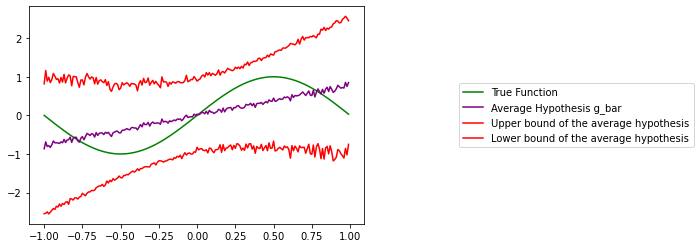

In [41]:
print('------ Calculations for Hypothesis set: h(x) = ax + b ------')
calc_bias_var_eout(gd_function_a, target_function, num_data_samples, num_x_samples) 
plot_graph(gd_function_a, target_function, num_data_samples, num_x_samples)

----- Calculations for Hypothesis set: h(x) = ax ------
The variance is:  0.22930006117510465
The bias is:  0.2887157265709774
The expected out-of-sample error is:  0.512642292831626
The variance+bias is:  0.518015787746082


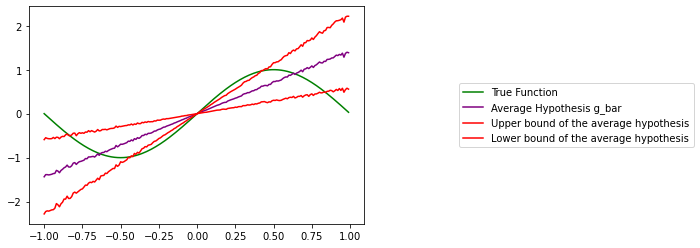

In [42]:
print('----- Calculations for Hypothesis set: h(x) = ax ------')
calc_bias_var_eout(gd_function_b, target_function, num_data_samples, num_x_samples)  
plot_graph(gd_function_b, target_function, num_data_samples, num_x_samples)


------ Calculations for Hypothesis set: h(x) = b ------
The variance is:  0.25070203727615165
The bias is:  0.5134145684845225
The expected out-of-sample error is:  0.7722004974166264
The variance+bias is:  0.7641166057606741


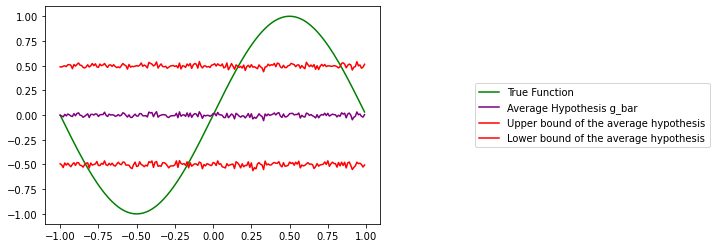

In [43]:
print('------ Calculations for Hypothesis set: h(x) = b ------')
calc_bias_var_eout(gd_function_c, target_function, num_data_samples, num_x_samples)
plot_graph(gd_function_c, target_function, num_data_samples, num_x_samples)